# Keras

**Keras** is a high-level API built on top of TensorFlow, designed for creating and training deep learning (DL) models with ease. This File provide simple examples for most common models that can be implemented in Keras.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Builing DL Model in Keras

In order to build basic deep learning models using Keras, you need to do the following steps:  
1. Load, preprocess and Split the Data: Import your dataset, get it ready for modeling by applying necessary preprocessing steps, and divide it into training and testing sets.
2. Choose a Deep Learning Model: Select the type of model that best fits your problem.
3. Define Model Architecture: Specify the layers and configurations of the chosen model, by setting layers and activation functions.
4. Compile, Train, and Evaluate the Model: Compile the model with loss functions and optimizers, train it on the training data, and evaluate its performance on the testing data.

We will build classification and regression models. In regression models, the number of output neurons equal the number of the variables we want to predict. In a classification task, the number of neurons in the output layer should match the number of categories or classes you want to predict.

## Regression

In this section, we'll demonstrate how to build and evaluate basic deep learning models for a regression task using Keras. We will consider a problem in which we need to determine the power using voltage as an input.

### Load and Prepare the Data

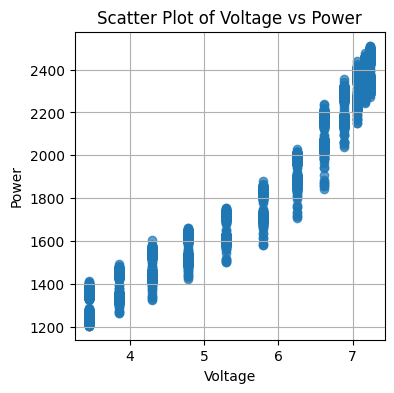

In [2]:
# open the database from CSV file. 
path = r"D:\Programming\Practice Python\Data\Two Variables\Dataset (2).csv" # you can choose of the 8 datasets from here
df = pd.read_csv(path)

# Create a scatter plot (if needed)
plt.figure(figsize=(4, 4))
plt.scatter(df['input_voltage'], df['el_power'], alpha=0.7)
plt.title('Scatter Plot of Voltage vs Power')
plt.xlabel('Voltage')
plt.ylabel('Power')
plt.grid(True)
plt.show()

In [3]:
# split and scale the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract input features (x) and target variable (y)
x = df[['input_voltage']]  # Note: x should be a DataFrame, hence double brackets
y = df['el_power']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # using 20% for testing

# Standardize features (optional but recommended)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Build the model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential() # select a model

# select layers and activation functions 
model.add(Input(shape=(x_train.shape[1],))) # Input layer
model.add(Dense(64, activation='relu')) # First hidden layer
model.add(Dense(32, activation='relu')) # Second hidden layer
model.add(Dense(1, activation='linear')) # Output layer (1 because it is regression task)

# Compile the model - select optimizers and loss function 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=100, # The number of times the entire training dataset is passed through 
                    batch_size=32, # The number of samples processed before the model is updated. 
                    verbose=0) # Controls the verbosity of the output during training

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [5]:
# Evaluate the model
loss, mse = model.evaluate(x_test, y_test)
print(f'Mean Squared Error: {mse}\nLoss: {loss}')

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 3701.1248 - mean_squared_error: 3701.1248
Mean Squared Error: 3676.392578125
Loss: 3676.392578125


## Classification
In this section, we will consider a classification problem in which we will determine the obesity level based on 16 features variable. The obesity levels are classified into 7 categories. However, because our features and target variables are not numerical, a preporcessing steps should be considered to encode their content before building DL model. 

### Load and Prepare the Data

In [6]:
# Load and prepare the data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
obesityEstimation = fetch_ucirepo(id=544)  
X = obesityEstimation.data.features 
y = obesityEstimation.data.targets

# print Dataset Characteristics
print("Name:", obesityEstimation.metadata['name'], "\nlink:", obesityEstimation.metadata['repository_url'])
print(f"We have {X.shape[0]} rows with {X.shape[1]} features variables and {y.shape[1]} target variable")
print("Features: ", X.columns)
print("Targets: ", y.columns)

Name: Estimation of Obesity Levels Based On Eating Habits and Physical Condition  
link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
We have 2111 rows with 16 features variables and 1 target variable
Features:  Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
Targets:  Index(['NObeyesdad'], dtype='object')


In [7]:
# prepare and preprocess the given data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Apply one-hot encoding to categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Convert the target to one-hot encoding
y_categorical = to_categorical(y_encoded)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

print(f"After preprocessing, we have {X_scaled.shape[0]} rows with {X_scaled.shape[1]}", end=' ') 
print(f"features variables and {y_categorical.shape[1]} target variable")

After preprocessing, we have 2111 rows with 23 features variables and 7 target variable


### Build the model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],))) # Input layer

# Hidden layers
model.add(Dense(64, activation='relu')) # first hidden layer
model.add(Dense(128, activation='relu')) # second hidden layer
model.add(Dropout(0.3))  # Dropout for regularization
model.add(Dense(64, activation='relu')) # third hidden layer

# Output layer
model.add(Dense(7, activation='softmax'))  # 7 categories for obesity levels

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, # The fraction of data to be used as validation data. Here, 20% is used for testing.
                    verbose=0)

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,703 (217.59 KB)

 Trainable params: 18,567 (72.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,136 (145.07 KB)

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 91.96%


# Model API

***Model API*** refers to the framework that allows users to build and manage neural network models. According to the Keras Documentation, Keras provides three APIs: Sequential, Functional, and Model Subclassing. These model are as follow:  

* The **Sequential API** is designed for creating models with a simple, linear stack of layers where each layer has exactly one input tensor and one output tensor. This API is well-suited for beginners and for tasks where the model architecture is linear and does not require complex interactions between layers.
* The **Functional API** offers greater flexibility and control, making it ideal for constructing more complex models with multiple inputs and outputs, shared layers, or non-sequential architectures. With the Functional API, users define models by specifying the input and output tensors explicitly, allowing for intricate architectures and fine-grained control over the model.
* **Model Subclassing** is used when you want to build everything from scratch. It allows for complete customization of the model's behavior by defining your own Model class and implementing the call method. This approach is useful for advanced users who need to implement custom training loops or unconventional network architectures.

In the bellow code, a regression model with three target variables is built to show how we can use these three APIs.

In [10]:
# fetch dataset 
from ucimlrepo import fetch_ucirepo 
student_performance = fetch_ucirepo(id=320) 

features = student_performance.data.features # Convert to DataFrame
X = features.select_dtypes(include='int64') # Extract columns with numeric values (int64)
y = student_performance.data.targets

print("Name:", student_performance.metadata['name'], "\nlink:", student_performance.metadata['repository_url'])
print("Features: ", X.columns)
print("Targets: ", y.columns)

from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # with scaling
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # without scaling (run to test)

Name: Student Performance 
link: https://archive.ics.uci.edu/dataset/320/student+performance
Features:  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')
Targets:  Index(['G1', 'G2', 'G3'], dtype='object')


### Build the models

In [11]:
# Sequential API
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model
model_sequential = Sequential()


model_sequential.add(Input(shape=(x_train.shape[1],)))
model_sequential.add(Dense(64, activation='relu'))
model_sequential.add(Dense(32, activation='relu'))
model_sequential.add(Dense(3, activation='linear')) # output 3 target variables

# Compile the model
model_sequential.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Summary of the model
model_sequential.summary()

# Train the model
history_sequential = model_sequential.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Funtional API
from tensorflow.keras.models import Model

# Define the layers
inputs = Input(shape=(x_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation='linear')(x)

# Create the model
model_functional = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_functional.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Summary of the model
model_functional.summary()

# Train the model
history_functional = model_functional.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras import layers

# Define the model using subclassing
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.dense3 = layers.Dense(3, activation='linear')

    def build(self, input_shape):
        super(MyModel, self).build(input_shape)
        self.dense1.build(input_shape)
        self.dense2.build((input_shape[0], 64))
        self.dense3.build((input_shape[0], 32))

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

# Create an instance of the model
model_subclass = MyModel()

# Compile the model
model_subclass.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Summary of the model
model_subclass.build(input_shape=(None, x_train.shape[1]))
model_subclass.summary()

# Train the model
history_subclass = model_subclass.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

### Evaluate the models

In [14]:
# Evaluate the model on the test set
loss_seq, mse_seq = model_sequential.evaluate(x_test, y_test, verbose=0)
print("Sequential Model")
print(f"Test Loss: {loss_seq}\nTest MSE: {mse_seq}")

loss_fcn, mse_fcn = model_functional.evaluate(x_test, y_test, verbose=0)
print("\nFunctional Model")
print(f"Test Loss: {loss_fcn}\nTest MSE: {mse_fcn}")

loss_fcn, mse_fcn = model_subclass.evaluate(x_test, y_test, verbose=0)
print("\nModel Subclassing")
print(f"Test Loss: {loss_fcn}\nTest MSE: {mse_fcn}")

Sequential Model
Test Loss: 9.685799598693848
Test MSE: 9.685799598693848

Functional Model
Test Loss: 9.144803047180176
Test MSE: 9.144803047180176

Model Subclassing
Test Loss: 9.669201850891113
Test MSE: 9.669201850891113


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Sequential
Mean Squared Error: 9.685799597939493
R^2 Score: -0.06328868865966797 



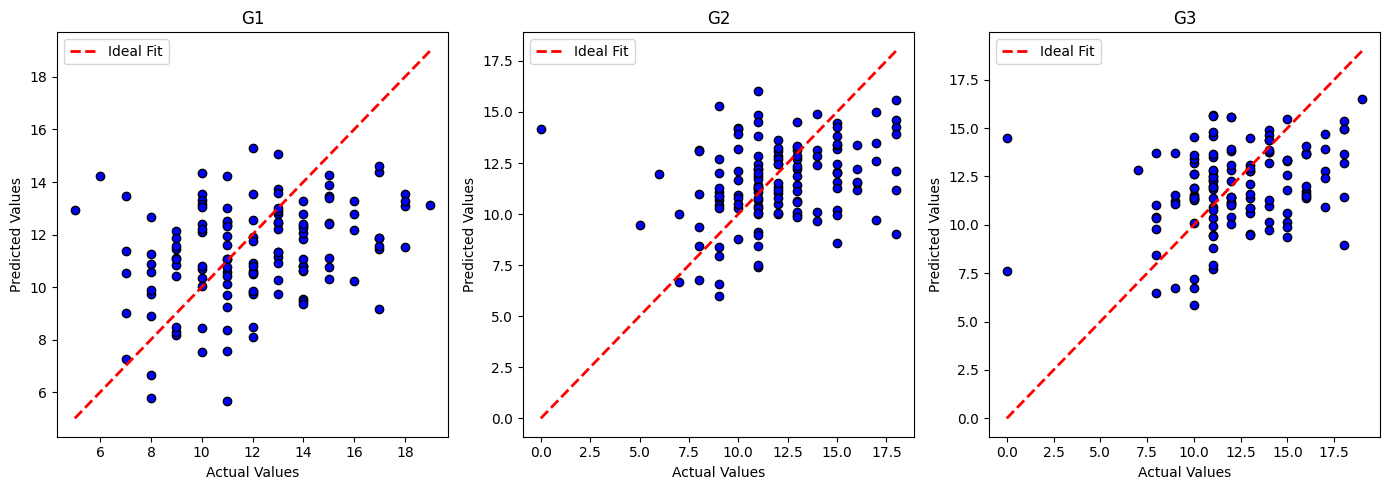


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Functional
Mean Squared Error: 9.144802709468026
R^2 Score: -0.0046652755700051785 



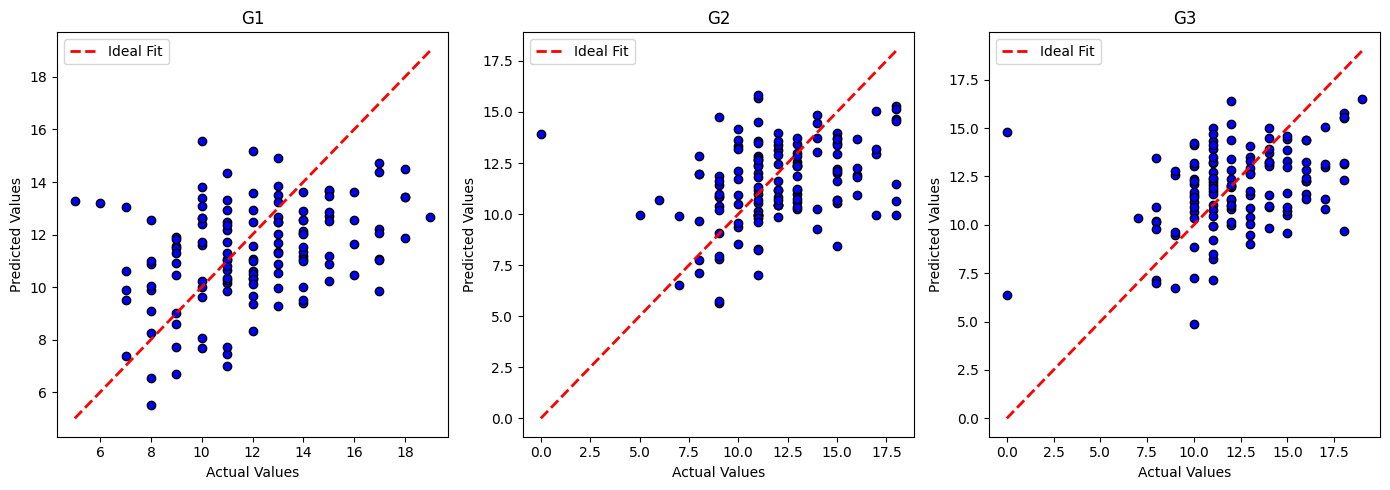


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000161E53A6480> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


MyModel
Mean Squared Error: 9.669201393139227
R^2 Score: -0.061881184577941895 



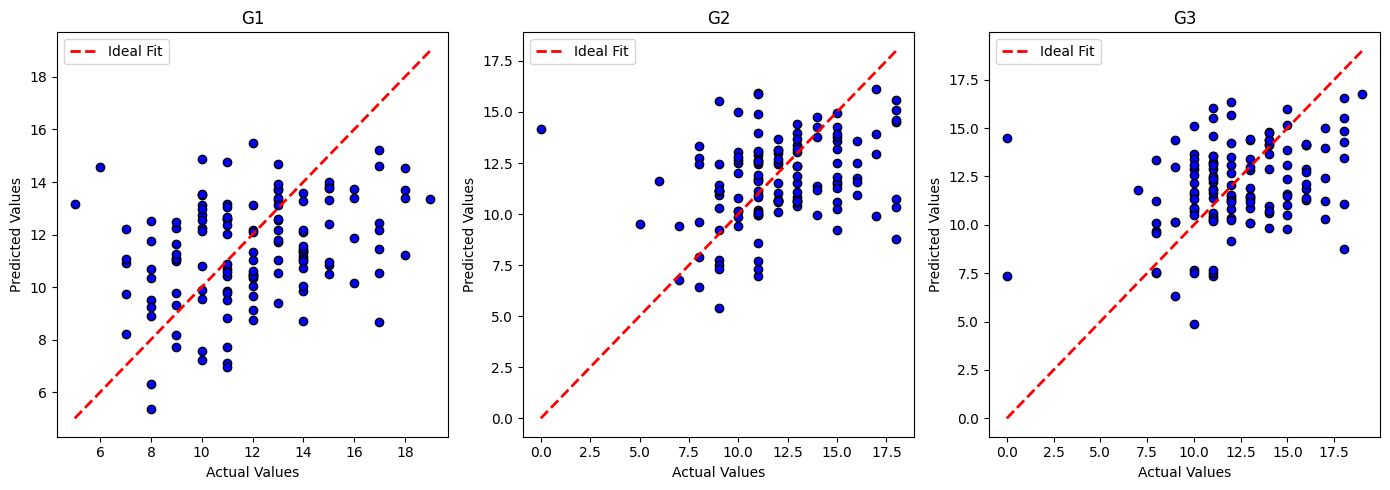

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_and_plot(model):
    # Predict on the test data
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n\n{model.__class__.__name__}")
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2, "\n")

    # Plot the results using scatter plot for each column
    fig, axs = plt.subplots(1, len(y.columns), figsize=(14, 5))
    for i, column in enumerate(y.columns):
        axs[i].scatter(y_test[column], y_pred[:, i], color='blue', edgecolor='k', alpha=1)
        axs[i].plot([y_test[column].min(), y_test[column].max()], 
                    [y_test[column].min(), y_test[column].max()], 
                    color='red', linestyle='--', linewidth=2, label='Ideal Fit')
        axs[i].set_xlabel('Actual Values')
        axs[i].set_ylabel('Predicted Values')
        axs[i].set_title(f'{column}')
        axs[i].legend()

    plt.tight_layout()
    plt.show()
    print()

evaluate_and_plot(model_sequential)
evaluate_and_plot(model_functional)
evaluate_and_plot(model_subclass)

# Define Model Architecture

***To define the Keras Model architecture, we need to:***   
1. Select a Model Type.
2. Select Layers.
3. Select Activation Functions.
4. Select Optimizers.
5. Select a Loss Function.  

In this section, We will explore five different sequential models which are:  
1. Basic Sequential model.
2. Model with more hidden layers.
3. Model with different activation functions.
4. Model with different optimizers.
5. Model with different cost function

All five models will be built using the Sequential API in Keras.

### Load and Prepare the Data

In [16]:
# open the database from CSV file. 
path = r"D:\Programming\Practice Python\Data\Two Variables\Dataset (2).csv" # you can choose of the 8 datasets from here
df = pd.read_csv(path)

# split and scale the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract input features (x) and target variable (y)
x = df[['input_voltage']]  # Note: x should be a DataFrame, hence double brackets
y = df['el_power']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # using 20% for testing

# Standardize features (optional but recommended)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### build the Models

In [17]:
# basic model with two hidden layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Build a sequential Keras model
model_2hidden = Sequential()
model_2hidden.add(Input(shape=(x_train.shape[1],)))
model_2hidden.add(Dense(units=64, activation='relu'))
model_2hidden.add(Dense(units=32, activation='relu'))
model_2hidden.add(Dense(units=1))

# Compile the model to prepare the model for training
model_2hidden.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_2hidden = model_2hidden.fit(x_train, y_train, 
                epochs=100, 
                batch_size=50, 
                validation_split=0.2, 
                verbose=0) 

# Predict using the trained model
y_pred_2hidden = model_2hidden.predict(x_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
# Model with four hidden layers

model_4hidden = Sequential()
model_4hidden.add(Input(shape=(x_train.shape[1],)))
model_4hidden.add(Dense(units=128, activation='relu'))
model_4hidden.add(Dense(units=64, activation='relu'))
model_4hidden.add(Dense(units=32, activation='relu'))
model_4hidden.add(Dense(units=16, activation='relu'))
model_4hidden.add(Dense(units=1))
model_4hidden.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and make predictions 
history_4hidden = model_4hidden.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred_4hidden = model_4hidden.predict(x_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
# Model with applying different activation functions 
from tensorflow.keras.layers import ELU

model_difAct = Sequential()
model_difAct.add(Input(shape=(x_train.shape[1],)))
model_difAct.add(Dense(units=64))
model_difAct.add(ELU(alpha=1.0))  # ELU activation
model_difAct.add(Dense(units=32))
model_difAct.add(ELU(alpha=1.0))  # ELU activation
model_difAct.add(Dense(units=1))
model_difAct.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and make predictions 
history_difAct = model_difAct.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred_difAct = model_difAct.predict(x_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
# Model with applying different opotimizer
model_rmsprop = Sequential()
model_rmsprop.add(Input(shape=(x_train.shape[1],)))
model_rmsprop.add(Dense(units=64, activation='relu'))
model_rmsprop.add(Dense(units=32, activation='relu'))
model_rmsprop.add(Dense(units=1))
model_rmsprop.compile(optimizer='rmsprop', loss='mean_squared_error')  # RMSprop optimizer

# Train the model and make predictions 
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred_rmsprop = model_rmsprop.predict(x_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
# Model with applying different cost function (mean absolute error)

model_mae = Sequential()
model_mae.add(Input(shape=(x_train.shape[1],)))
model_mae.add(Dense(units=64, activation='relu'))
model_mae.add(Dense(units=32, activation='relu'))
model_mae.add(Dense(units=1))

# Compile the model to prepare it for training with Mean Absolute Error as the loss function
model_mae.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model and make predictions 
history_mae = model_mae.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0) 
y_pred_mae = model_mae.predict(x_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


### Evaluate the models

In [22]:
# Make list of models, names, histories of training, and predictions 
models = [model_2hidden, model_4hidden, model_difAct, model_rmsprop, model_mae]
models_names = [ "2 Hidden Layers", "4 Hidden Layers", "Different Activation Function", "rmsprop Optimizer", 
               "MAE Cost Function"]
histories = [history_2hidden, history_4hidden, history_difAct, history_rmsprop, history_mae]
y_preds = [y_pred_2hidden, y_pred_4hidden, y_pred_difAct, y_pred_rmsprop, y_pred_mae]

In [23]:
from sklearn.metrics import mean_squared_error

for i in range(len(models)):
    current_model = models[i]
    current_name = models_names[i]
    prediction = y_preds[i]
    
    loss = current_model.evaluate(x_test, y_test, verbose=0)
    print(f"\nModel: {current_name}, Test loss: {loss}") # Notice how the loss for MAE model is very small!
    

    mse = mean_squared_error(y_test, prediction)
    print(f"Mean Squared Error: {mse}")


Model: 2 Hidden Layers, Test loss: 3670.62060546875
Mean Squared Error: 3670.6202847338905

Model: 4 Hidden Layers, Test loss: 3781.68896484375
Mean Squared Error: 3781.6901740005483

Model: Different Activation Function, Test loss: 9212.32421875
Mean Squared Error: 9212.323427784479

Model: rmsprop Optimizer, Test loss: 3860.963134765625
Mean Squared Error: 3860.963323464725

Model: MAE Cost Function, Test loss: 58.495487213134766
Mean Squared Error: 4047.889731598375


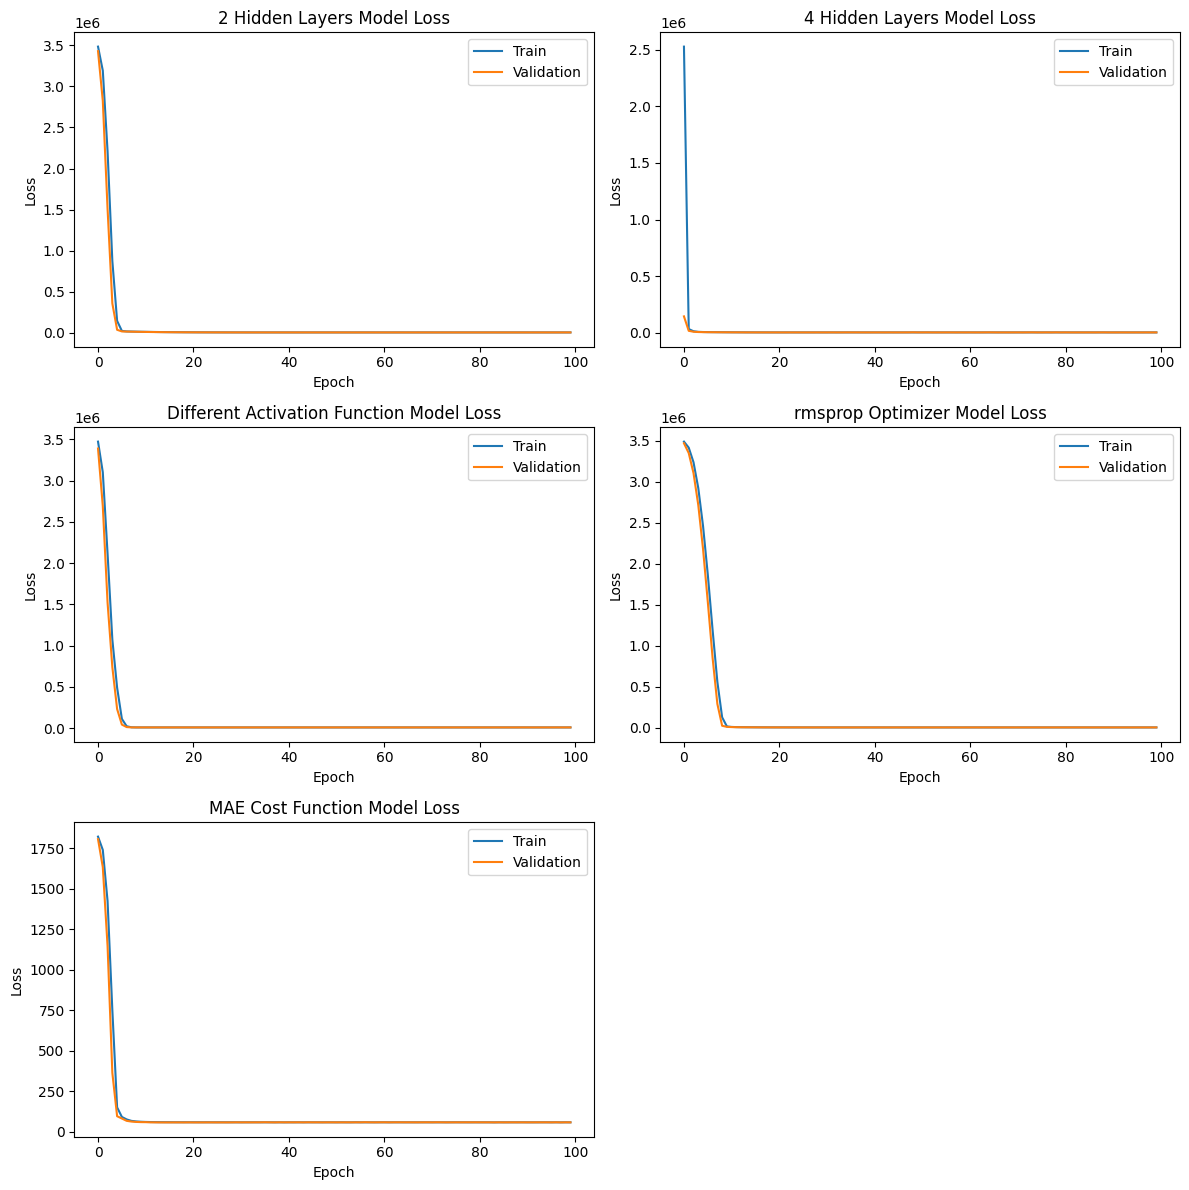

In [24]:
# Plot the loss during training 

# Number of models
num_models = len(histories)

# Define the number of columns and rows
num_cols = 2
num_rows = (num_models + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through the models and plot their histories
for i in range(num_models):
    history = histories[i]
    model_name = models_names[i]
    
    # Plot on the corresponding subplot
    ax = axes[i]
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title(f'{model_name} Model Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

    # zoome-in if needed
    #ax.set_ylim(0, 10000) 
    #ax.set_xlim(80, 100)
    ax.legend(['Train', 'Validation'], loc='upper right')

# Hide any extra subplots if there are fewer models than subplot slots
for j in range(num_models, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

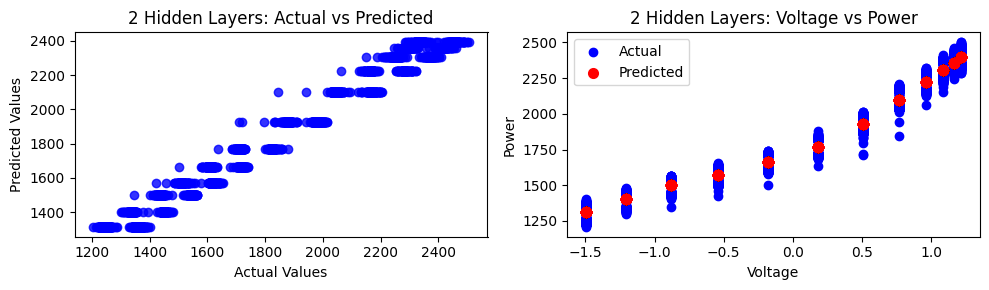

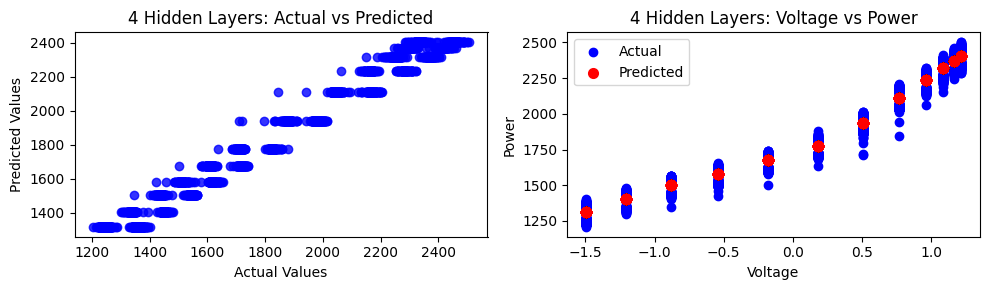

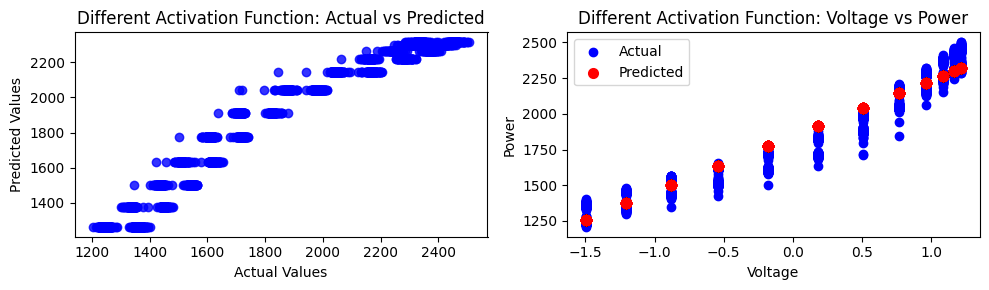

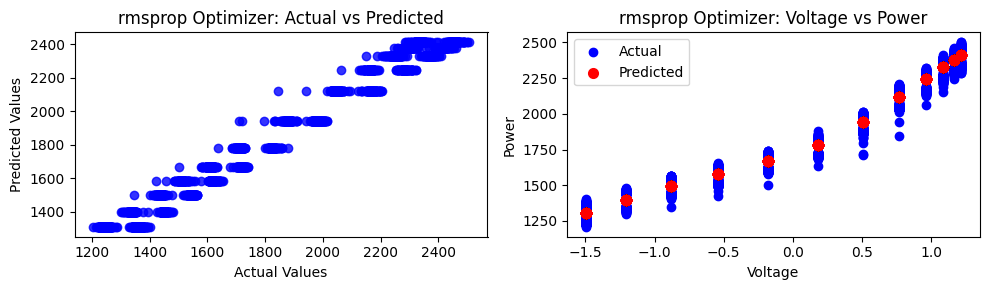

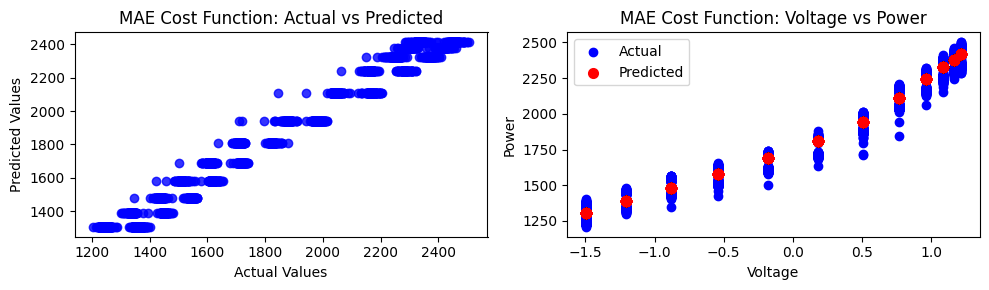

In [25]:
# Evaluate predictions of the model 
""" Make plots to verfy predictions. Two type of plots are made here:
    1. A scatter plot of actual vs predicted data. The more linear and centered in the middle it is,
        the more accurate it is.
    2. A scatter plot for both actual and predicted results for volage and power values from the dataset.
        you can compare how predicted results deviate from the actual ones."""

for i in range(len(y_preds)):
    y_pred = y_preds[i]
    model_name = models_names[i]
    
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    
    # Plot 1: Scatter plot of actual vs predicted values
    axes[0].scatter(y_test, y_pred, color='blue', alpha=0.8)
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    axes[0].set_title(f'{model_name}: Actual vs Predicted')
    
    # Plot 2: Compare actual and predicted values using scatter plot
    axes[1].scatter(x_test, y_test, color='blue', label='Actual')
    axes[1].scatter(x_test, y_pred, color='red', linewidth=2, label='Predicted')
    axes[1].set_xlabel('Voltage')
    axes[1].set_ylabel('Power')
    axes[1].set_title(f'{model_name}: Voltage vs Power')
    axes[1].legend()
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the grid of plots
    plt.show()

# Configuring Model Layers

We have many layers types in Keras. We will consider here a regression problem where we have multiple features and one target variable. We have used the following layers in our model:  

1. **Dense Layers**: Dense layers are fully connected layers where every neuron receives input from all neurons in the previous layer. They are essential in neural networks for learning complex relationships in the data. Dense layers often use activation functions like ReLU in hidden layers and a linear activation in the output layer for regression tasks.

2. **Dropout Layers**: Dropout is a regularization technique designed to prevent overfitting. By randomly setting a fraction of neurons to zero during training, dropout forces the network to learn more robust features and reduces dependency on specific neurons. In your model, a dropout rate of 0.5 means that half of the neurons are dropped out at each training step.

3. **Batch Normalization Layers**: Batch normalization normalizes the inputs of each layer by adjusting and scaling activations. This technique helps stabilize and speed up training by reducing internal covariate shift. It also has a mild regularizing effect, improving the model’s generalization.

4. **Flatten Layers**: Flatten layers convert multi-dimensional outputs from previous layers (such as convolutional layers) into one-dimensional vectors. This transformation is necessary to feed the data into dense layers, enabling the network to make predictions or perform classifications after feature extraction.

5. **Activity Regularization Layers**: Activity regularization adds a penalty to the loss function based on neuron activations, helping to prevent overfitting. By applying constraints like L1 regularization, which penalizes the absolute values of activations, these layers encourage the model to learn more generalized features.

6. **Convolutional Layers (Conv1D)**: Convolutional layers apply filters to input data to extract features, particularly useful for sequential or temporal data. In your models, Conv1D layers detect patterns in the data, though they are more commonly used in tasks involving spatial hierarchies, such as image processing.

In [26]:
# fetch dataset 
from ucimlrepo import fetch_ucirepo 
student_performance = fetch_ucirepo(id=320) 

features = student_performance.data.features # Convert to DataFrame
X = features.select_dtypes(include='int64') # Extract columns with numeric values (int64)
y = student_performance.data.targets
y = y.drop(columns=['G2', 'G3'])

print("Name:", student_performance.metadata['name'], "\nlink:", student_performance.metadata['repository_url'])
print("Features: ", X.columns)
print("Targets: ", y.columns)

from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # with scaling
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # without scaling (run to test)

Name: Student Performance 
link: https://archive.ics.uci.edu/dataset/320/student+performance
Features:  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')
Targets:  Index(['G1'], dtype='object')


### build the models

In [27]:
# Dense Layers
from keras.models import Sequential
from keras.layers import Dense, Input

model_dense = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression (linear activation by default)
])

# compile and train the model
model_dense.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history_dense = model_dense.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [28]:
# Dropout Layers
from keras.layers import Dense, Dropout, Input

model_dropout = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer for regression
])

# compile and train the model
model_dropout.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history_dropout = model_dropout.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [29]:
# Batch Normalization Layers
from keras.layers import Dense, BatchNormalization, Input

model_batch_norm = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu', ),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Output layer for regression
])

# compile and train the model
model_batch_norm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history_batch_norm = model_batch_norm.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [30]:
# Flatten and Dense Layers
""" Flatten layers are usually used with convolutional layers"""
from keras.layers import Dense, Conv1D, Flatten, Input

model_flatten = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# compile and train the model
model_flatten.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history_flatten = model_flatten.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [31]:
# Activity Regularization Layers
from keras.layers import Dense, ActivityRegularization, Input

model_activity_reg = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    ActivityRegularization(l1=0.01),
    Dense(32, activation='relu'),
    ActivityRegularization(l1=0.01),
    Dense(1)  # Output layer for regression
])

# compile and train the model
model_activity_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history_activity_reg = model_activity_reg.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [32]:
# Convolutional Layers (Conv1D)
""" This is not typically used for regression task. However, it is used here to show how it works"""
from keras.layers import Conv1D, Dense, Flatten, Input

# Reshape data for Conv1D
X_scaled_reshaped = np.expand_dims(X_scaled, axis=-1)

model_conv1d = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# compile and train the model
model_conv1d.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history_conv1d = model_conv1d.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

### Evaluate the model

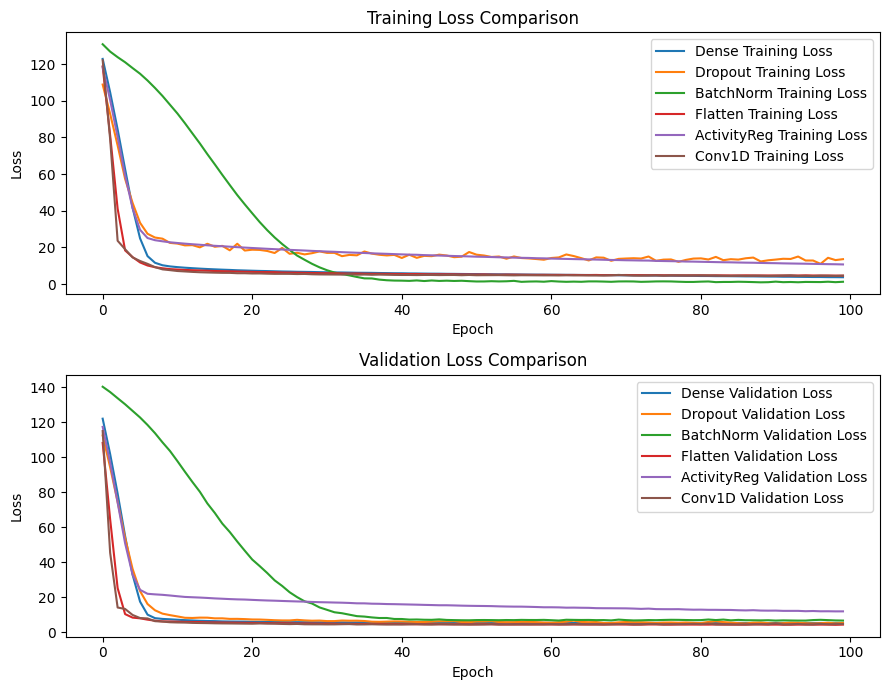

In [33]:
import matplotlib.pyplot as plt

def plot_training_history(histories, model_names):
    plt.figure(figsize=(9, 7))
    
    # Plot for Training Loss
    plt.subplot(2, 1, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Training Loss')
    plt.title('Training Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # zoom-in if needed
    #plt.xlim([60, 100])
    #plt.ylim([0, 20])
    plt.legend()
    
    # Plot for Validation Loss
    plt.subplot(2, 1, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # zoom-in if needed
    #plt.xlim([60, 100])
    #plt.ylim([0, 20])
    plt.legend()

    plt.tight_layout()
    plt.show()

# List of model histories and their names
histories = [history_dense, history_dropout, history_batch_norm, history_flatten, history_activity_reg, history_conv1d]
model_names = ['Dense', 'Dropout', 'BatchNorm', 'Flatten', 'ActivityReg', 'Conv1D']

plot_training_history(histories, model_names)


In [34]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, x_test, y_test):
    for model, name in zip(models, model_names):
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'{name} Test MSE: {mse}\n')

# List of models
models = [model_dense, model_dropout, model_batch_norm, model_flatten, model_activity_reg, model_conv1d]
evaluate_models(models, x_test, y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Dense Test MSE: 9.789692329944431

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Dropout Test MSE: 9.803626570380569

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
BatchNorm Test MSE: 9.553364207746382

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Flatten Test MSE: 7.745254422454451

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ActivityReg Test MSE: 10.196019681308615

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Conv1D Test MSE: 8.460188787922037



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


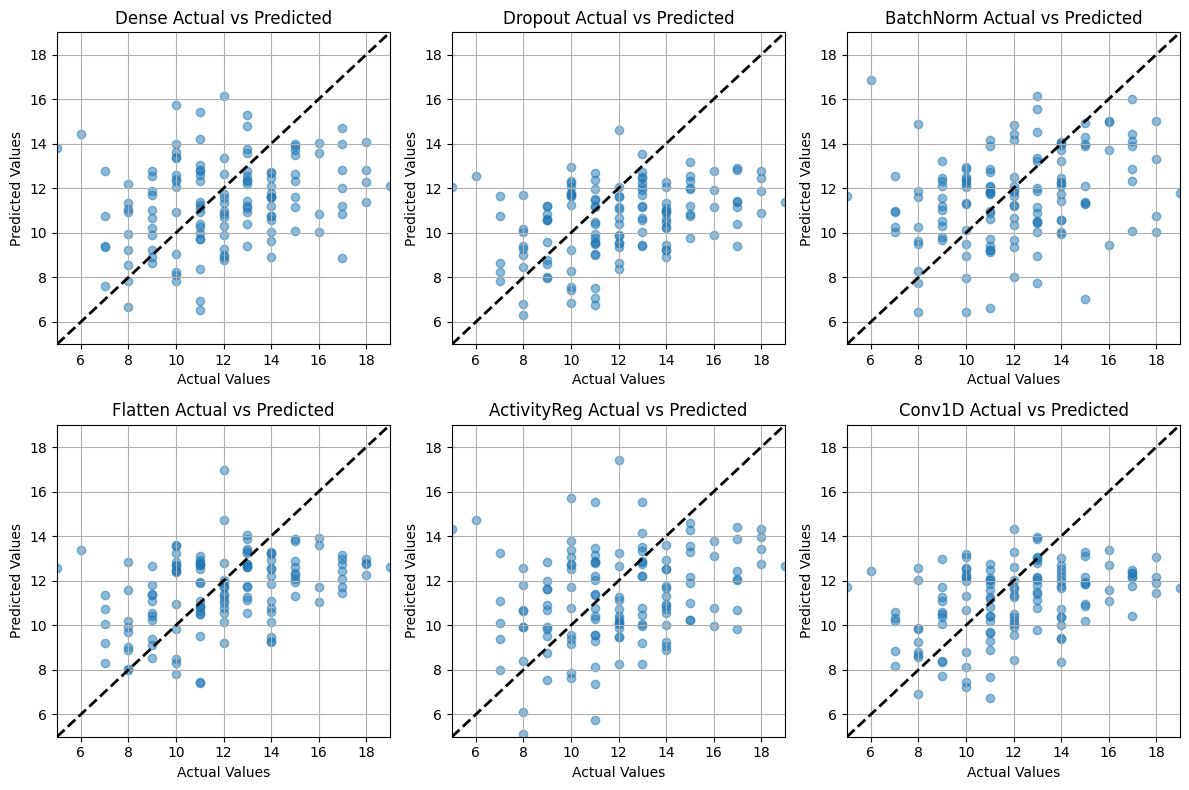

In [35]:
def plot_actual_vs_predicted(models, x_test, y_test, model_names):
    plt.figure(figsize=(12, 8))
    
    y_test = np.array(y_test)  # Ensure y_test is a numpy array
    
    for i, (model, name) in enumerate(zip(models, model_names), 1):
        y_pred = model.predict(x_test)
        y_pred = np.array(y_pred)  # Ensure y_pred is a numpy array

        plt.subplot(2, 3, i)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
        plt.title(f'{name} Actual vs Predicted')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.xlim([y_test.min(), y_test.max()])
        plt.ylim([y_test.min(), y_test.max()])
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# List of models and their names
models = [model_dense, model_dropout, model_batch_norm, model_flatten, model_activity_reg, model_conv1d]
model_names = ['Dense', 'Dropout', 'BatchNorm', 'Flatten', 'ActivityReg', 'Conv1D']

plot_actual_vs_predicted(models, x_test, y_test, model_names)

# Final Example

A solid understanding of Keras Library can be achieved by understanding the three following keys:
1. Selecting a model API. We have Sequntial, Functional, and Subclassing. 
2. Defining model architecture. This is achieved by selecting appropriate layers, activation functions, optimizers, and loss function. 
3. Configuring the model layers.This can be done by making the suitable layers desing. You can choose from Dense, Dropout, Batch normalization, flatten, activity regulation, and convolutional layers.

Previously, these principles are demonstrated using a basic regression task. In this final example, we will show that the same principles can help us to build a classificaiotn model. Here, we will consider a classification task in which we have images of 8X8 pixels that displays numbers from 0 to 9. The task here is to categorize these numbers. 

### Load and Prepare the data

In [36]:
# Extract the data
""" This data is a digit data from 0 to 9 which are based in a 64 pixel grid"""
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

print("Name:", optical_recognition_of_handwritten_digits.metadata['name'], 
      "\nlink:", optical_recognition_of_handwritten_digits.metadata['repository_url'])
print("Features: ", X.columns)
print("Targets: ", y.columns)

Name: Optical Recognition of Handwritten Digits 
link: https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits
Features:  Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Attribute37', 'Attribute38',
       'Attribute39', 'Attribute40', 'Attribute41', 'Attribute42',
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attri

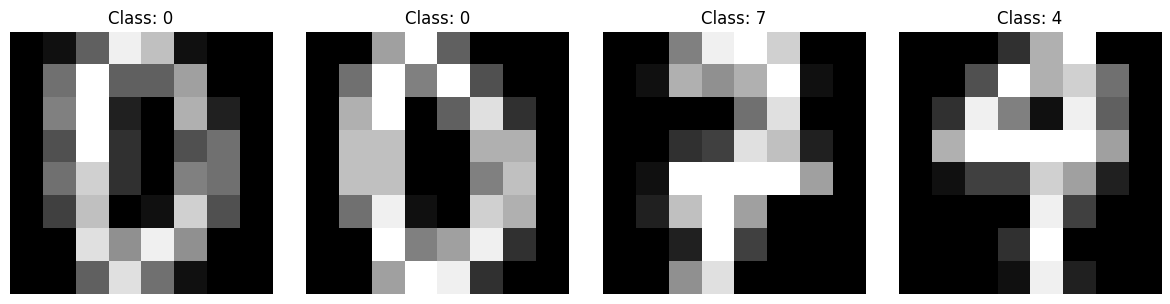

In [37]:
# Plot Numbers from the data as an exampel 
num_rows = 1 # increase number of rows to plot more if needed

num_cols = 4 # change number of grid columns if needed
num_images = num_rows * num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows*3))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

# Plot each image in the grid
for i in range(num_images):
    index = i
    image_data = X.iloc[index].values
    image_reshaped = image_data.reshape(8, 8)
    
    axes[i].imshow(image_reshaped, cmap='gray')
    axes[i].set_title(f'Class: {y.iloc[index, 0]}')
    axes[i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [38]:
# Split the dataset into training and testing sets
from tensorflow.keras.utils import to_categorical

# flatten the y dataframe
y = y['class'].values.ravel()

# Apply encoding to y so we have a binary matrix of 10 classes 
y = to_categorical(y, num_classes=10)

# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # using 20% for testing

***To achieve this classification task, six different models were built as:***
1. **Sequential Model with ReLU Activation**: This model is built using the Sequential API and consists of three dense layers. The first two layers have 64 and 32 neurons, respectively, both using the ReLU activation function. A dropout layer is included between the dense layers to prevent overfitting, with a dropout rate of 0.5. The final output layer uses the softmax activation function to handle a 10-class classification task. The model is compiled with the Adam optimizer and binary cross-entropy loss function.  

2. **Functional Model with ReLU Activation**: This model is built using the Functional API, allowing more flexibility in model design. It has a similar architecture to the Sequential model, with layers defined as functions of the input. The model includes 64 and 32 neurons in the hidden layers, ReLU activation, dropout, and a softmax output layer for multi-class classification. Adam optimizer and binary cross-entropy are used for compilation.

3. **Model with Different Layers and Activation Functions**: This Sequential model features a deeper architecture with layers of 128 and 64 neurons using the Tanh activation function. Batch normalization is applied after each dense layer to stabilize and speed up training, and dropout is used to reduce overfitting. The model is compiled with the categorical cross-entropy loss function and the Adam optimizer, aiming to classify inputs into 10 classes.

4. **Model Using SGD Optimizer**: This model is structurally similar to the first Sequential model but differs in the optimization algorithm. Instead of Adam, this model uses the Stochastic Gradient Descent (SGD) optimizer. It has 64 and 32 neurons in its dense layers, uses ReLU activation, includes dropout, and outputs class probabilities through a softmax layer. The loss function used is binary cross-entropy.

5. **Model with Categorical Cross-Entropy Loss Function**: This Sequential model is similar to the first one but uses the categorical cross-entropy loss function instead of binary cross-entropy. It has two dense layers with 64 and 32 neurons, ReLU activation, dropout for regularization, and a softmax output layer for 10-class classification. The Adam optimizer is used for training.

6. **Convolutional Neural Network (CNN) Model**: This model leverages convolutional layers for image-like data. It starts with two convolutional layers (with 32 and 64 filters) followed by max-pooling and dropout layers. The model then flattens the data and passes it through a dense layer with 128 neurons, followed by a dropout layer. The final output layer is a softmax layer with 10 units. The model is compiled with the Adam optimizer and categorical cross-entropy loss, suitable for multi-class classification tasks on image data.

### Build the models

In [39]:
# Build model with Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Select model API
model_seq = Sequential()

# Define Layers and activation functions
model_seq.add(Input(shape=(x_train.shape[1],)))
model_seq.add(Dense(64, activation='relu'))
model_seq.add(Dropout(0.5))
model_seq.add(Dense(32, activation='relu'))
model_seq.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

# Define optimizers and cost function
model_seq.compile(optimizer=Adam(), loss='binary_crossentropy', 
                  metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model and make predictions 
history_seq = model_seq.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred = model_seq.predict(x_test)

# Convert y_pred from one-hot encoded to class labels so we can evaluate it
y_pred_seq = np.argmax(y_pred, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [40]:
# Build model with Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the input layer
inputs = Input(shape=(x_train.shape[1],))

# Define the hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)  # 10 units for 10 classes

# Create the model
model_func = Model(inputs=inputs, outputs=outputs)

# Define optimizers and cost function
model_func.compile(optimizer=Adam(), loss='binary_crossentropy', 
                   metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model and make predictions 
history_func = model_func.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred = model_func.predict(x_test)

# Convert y_pred from one-hot encoded to class labels so we can evaluate it
y_pred_func = np.argmax(y_pred, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
# Build the model with differnt layers and activation functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Select model API
model_Dlayers = Sequential()

# Define Layers and activation functions
model_Dlayers.add(Input(shape=(x_train.shape[1],)))
model_Dlayers.add(Dense(128, activation='tanh'))
model_Dlayers.add(BatchNormalization())
model_Dlayers.add(Dropout(0.3))
model_Dlayers.add(Dense(64, activation='tanh'))
model_Dlayers.add(BatchNormalization())
model_Dlayers.add(Dropout(0.3))
model_Dlayers.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

# Define optimizers and cost function
model_Dlayers.compile(optimizer=Adam(), loss='categorical_crossentropy', 
                      metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model and make predictions 
history_Dlayers = model_Dlayers.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred = model_Dlayers.predict(x_test)

# Convert y_pred from one-hot encoded to class labels so we can evaluate it
y_pred_Dlayers = np.argmax(y_pred, axis=1)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
# Build the model using SGD optimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Select model API
model_SGDoptimizer = Sequential()

# Define Layers and activation functions
model_SGDoptimizer.add(Input(shape=(x_train.shape[1],)))
model_SGDoptimizer.add(Dense(64, activation='relu'))
model_SGDoptimizer.add(Dropout(0.5))
model_SGDoptimizer.add(Dense(32, activation='relu'))
model_SGDoptimizer.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

# Define optimizers and cost function
model_SGDoptimizer.compile(optimizer=SGD(), loss='binary_crossentropy', 
                           metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model and make predictions 
history_SGDoptimizer = model_SGDoptimizer.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred = model_SGDoptimizer.predict(x_test)

# Convert y_pred from one-hot encoded to class labels so we can evaluate it
y_pred_SGDoptimizer = np.argmax(y_pred, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
# Build the model using different loss function; 'categorical_crossentropy'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Select model API
model_categorical_crossentropy = Sequential()

# Define Layers and activation functions
model_categorical_crossentropy.add(Input(shape=(x_train.shape[1],)))
model_categorical_crossentropy.add(Dense(64, activation='relu'))
model_categorical_crossentropy.add(Dropout(0.5))
model_categorical_crossentropy.add(Dense(32, activation='relu'))
model_categorical_crossentropy.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

# Define optimizers and cost function
model_categorical_crossentropy.compile(optimizer=Adam(), loss='categorical_crossentropy', 
                                       metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model and make predictions 
history_categorical_crossentropy = model_categorical_crossentropy.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred = model_categorical_crossentropy.predict(x_test)

# Convert y_pred from one-hot encoded to class labels so we can evaluate it
y_pred_categorical_crossentropy = np.argmax(y_pred, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
# Build a model using Convolutional Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape the arrays (Here: the input is suitable for a CNN with 8x8 images and 1 channel)
x_train_reshaped = x_train.values.reshape(-1, 8, 8, 1)
x_test_reshaped = x_test.values.reshape(-1, 8, 8, 1)

# Select model API
model_conv = Sequential()

# Define Layers and activation functions
model_conv.add(Input(shape=(8, 8, 1)))  # Adjust input shape to match reshaped data
model_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))  # Output shape becomes (3, 3, 32)
model_conv.add(Dropout(0.25))
model_conv.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Output shape becomes (1, 1, 64)
model_conv.add(Flatten())
model_conv.add(Dense(128, activation='relu'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

# Define optimizers and cost function
model_conv.compile(optimizer=Adam(), loss='categorical_crossentropy', 
                   metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model and make predictions 
history_conv = model_conv.fit(x_train_reshaped, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)
y_pred = model_conv.predict(x_test_reshaped)

# Convert y_pred from probabilities to class labels so we can evaluate it
y_pred_conv = np.argmax(y_pred, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Evaluate the models 

In [45]:
# List all models
models = [model_seq, model_func, model_Dlayers, model_SGDoptimizer, model_categorical_crossentropy, model_conv]
predictions = [y_pred_seq, y_pred_func,  y_pred_Dlayers, y_pred_SGDoptimizer, y_pred_categorical_crossentropy, y_pred_conv]
histories = [history_seq, history_func, history_Dlayers, history_SGDoptimizer, history_categorical_crossentropy, history_conv]
models_names = ["Sequential Model", "Functional Model", "Different Layers and Activation Func", "Different Optimizer",  
                "Categorical Crossentropy loss", "Convolutional Layers"]

***Evaluate Using Keras Library Metrics***

In [46]:
# Print evaluations metrics using Keras
for i in range(len(models)-1):
    model = models[i]
    name = models_names[i]

    print(f"\nModel: {name}")
    test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test AUC: {test_auc:.4f}")

# Evaluate the Convolutional Model seprately using "x_test_reshaped"
print("\nModel: Convolutional Layers")
test_loss, test_accuracy, test_precision, test_recall, test_auc = model_conv.evaluate(x_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Model: Sequential Model
Test Accuracy: 0.9742
Test Precision: 0.9768
Test Recall: 0.9724
Test AUC: 0.9950

Model: Functional Model
Test Accuracy: 0.9742
Test Precision: 0.9803
Test Recall: 0.9733
Test AUC: 0.9955

Model: Different Layers and Activation Func
Test Accuracy: 0.9840
Test Precision: 0.9840
Test Recall: 0.9831
Test AUC: 0.9980

Model: Different Optimizer
Test Accuracy: 0.9528
Test Precision: 0.9619
Test Recall: 0.9440
Test AUC: 0.9952

Model: Categorical Crossentropy loss
Test Accuracy: 0.9751
Test Precision: 0.9794
Test Recall: 0.9751
Test AUC: 0.9983

Model: Convolutional Layers
Test Accuracy: 0.9893
Test Precision: 0.9893
Test Recall: 0.9893
Test AUC: 0.9976


Model Sequential Model


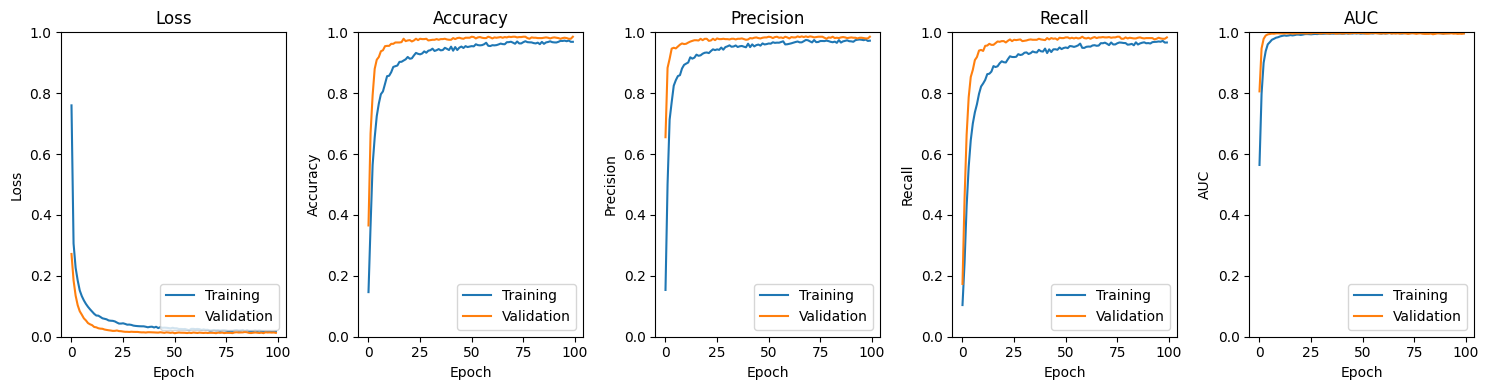


Model Functional Model


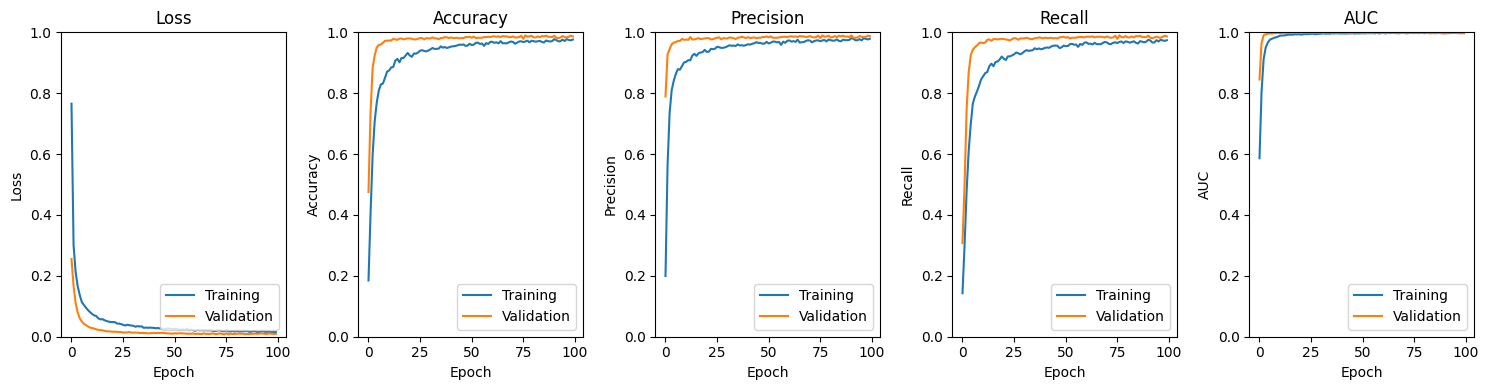


Model Different Layers and Activation Func


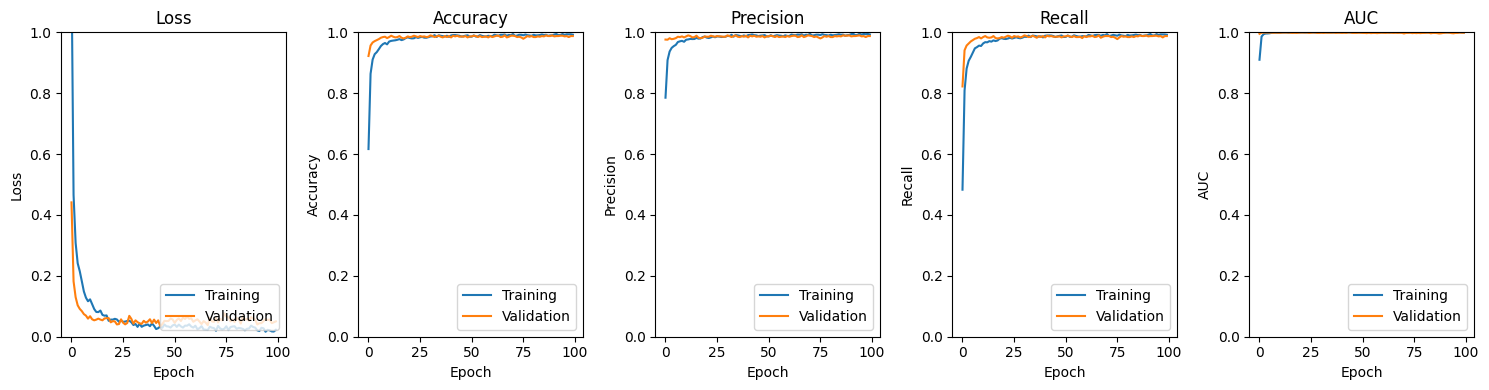


Model Different Optimizer


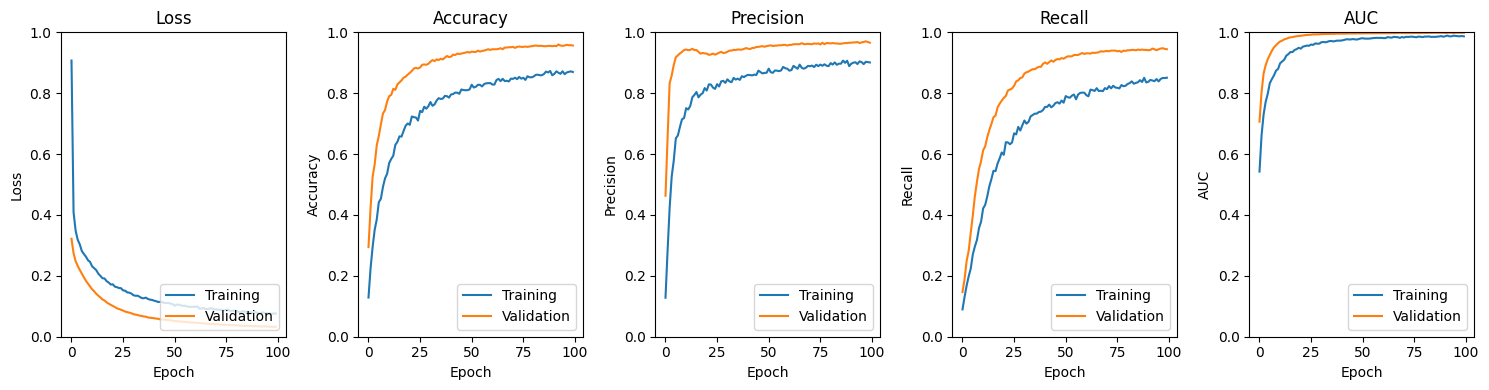


Model Categorical Crossentropy loss


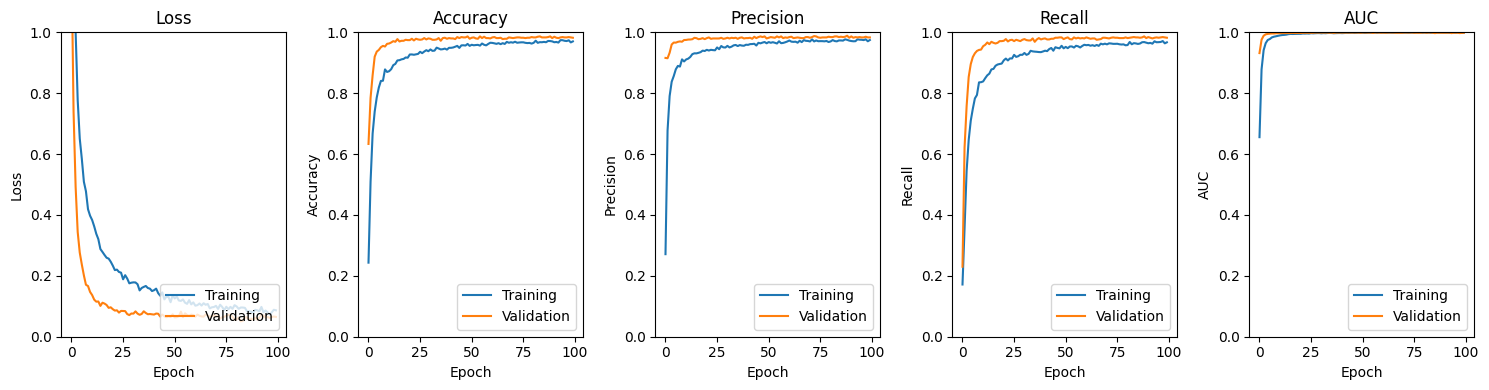


Model Convolutional Layers


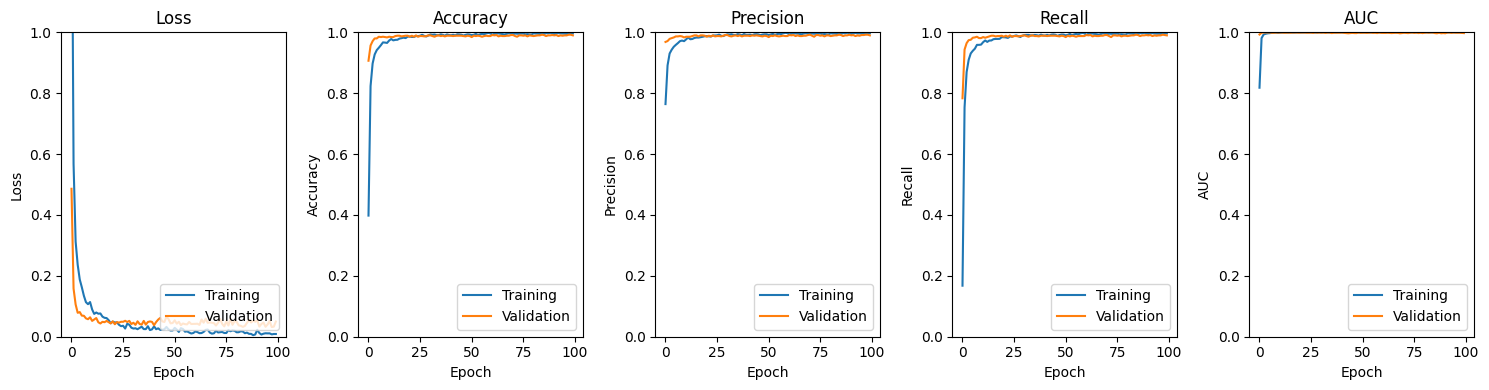

In [47]:
# Plot history of training and validation from the keras library 

# Define metrics and labels
metrics = {
    'loss': 'Loss',
    'accuracy': 'Accuracy',
    'Precision': 'Precision',
    'Recall': 'Recall',
    'AUC': 'AUC'
}

for i in range(len(models)):
    history = histories[i]
    name = models_names[i]

    print(f"Model {name}")
    
    # Create a grid of 5 columns
    num_metrics = len(metrics)
    num_cols = 5
    num_rows = (num_metrics + num_cols - 1) // num_cols  # Calculate the number of rows needed
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axs = axs.flatten()  # Flatten the 2D array of axes to simplify indexing
    
    # Plot each metric
    for i, (metric_key, metric_label) in enumerate(metrics.items()):
        axs[i].plot(history.history[metric_key], label="Training")
        axs[i].plot(history.history[f'val_{metric_key}'], label="Validation")
        axs[i].set_xlabel('Epoch')
        axs[i].set_ylabel(metric_label)
        axs[i].legend(loc='lower right')
        axs[i].set_title(f'{metric_label}')
        axs[i].set_ylim([0, 1])  # Adjust this if needed
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    print()

***Evaluate Using sk-learn Library Metrics***

In [48]:
# Convert y_test from one-hot encoded to class labels so we can evaluate it using sklearn library
y_test = np.argmax(y_test, axis=1)

In [49]:
# Print Classification Reports
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
for i in range(len(models)):
    y_predict = predictions[i]
    name = models_names[i]
    
    print(f"Classification Report {name}:")
    print(classification_report(y_test, y_predict, target_names=[str(i) for i in range(10)]))
    print()

Classification Report Sequential Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.95      0.97      0.96       102
           2       0.98      0.99      0.99       107
           3       1.00      0.97      0.98       118
           4       0.97      0.98      0.97       117
           5       0.97      0.96      0.96        97
           6       0.97      0.98      0.97       123
           7       0.99      1.00      1.00       124
           8       0.95      0.96      0.96       105
           9       0.96      0.93      0.95       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124


Classification Report Functional Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.95      0.98      0.97       1

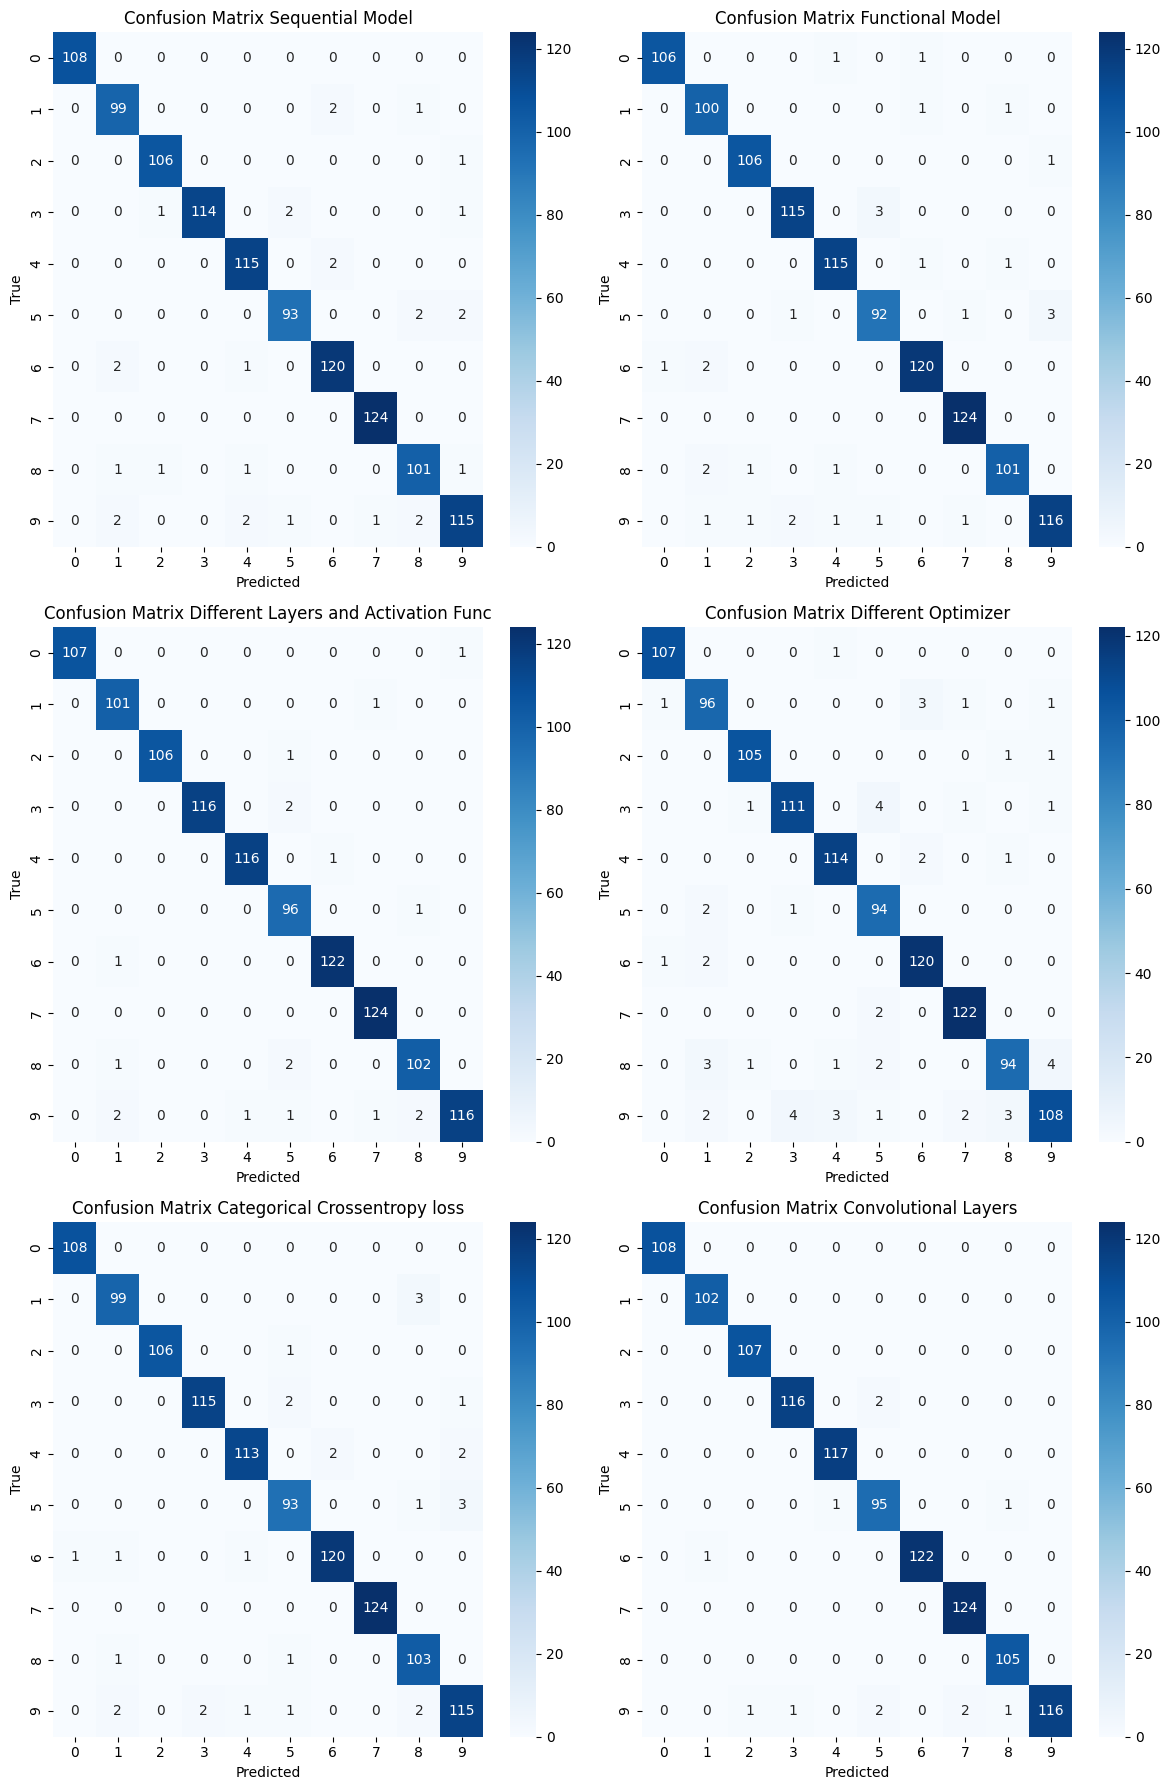

In [50]:
# Plot Confusion Matrix 
from sklearn.metrics import confusion_matrix

# Number of models
num_models = len(models)
num_rows = (num_models + 1) // 2 # Determine the number of rows needed for the grid (ceil(num_models / 2))

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot each confusion matrix
for i in range(num_models):
    y_predict = predictions[i]
    name = models_names[i]
    
    conf_matrix = confusion_matrix(y_test, y_predict)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)], ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Confusion Matrix {name}')

# Remove any empty subplots
for j in range(num_models, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()